In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_meal=pd.read_csv("meal_info.csv")

df_meal.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
df_center=pd.read_csv("fulfilment_center_info.csv")
df_center.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [19]:
df_food=pd.read_csv('train.csv')
df_food.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [25]:
df = pd.merge(df_meal, pd.merge(df_food, df_center, on='center_id'), on='meal_id')
df.head()

,meal_id,category,cuisine,id,week,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1885,Beverages,Thai,1379560,1,55,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1885,Beverages,Thai,1018704,2,55,135.83,152.29,0,0,323,647,56,TYPE_C,2.0
2,1885,Beverages,Thai,1196273,3,55,132.92,133.92,0,0,96,647,56,TYPE_C,2.0
3,1885,Beverages,Thai,1116527,4,55,135.86,134.86,0,0,163,647,56,TYPE_C,2.0
4,1885,Beverages,Thai,1343872,5,55,146.50,147.50,0,0,215,647,56,TYPE_C,2.0


In [26]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


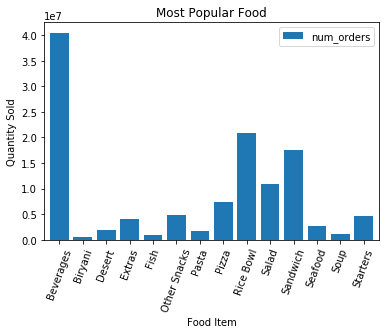

In [66]:
table.plot(kind='bar',width=0.8)
plt.xticks(rotation=70) 
plt.xlabel('Food Item')
plt.ylabel('Quantity Sold')
plt.title('Most Popular Food')
plt.savefig('Most_Popular_Food.png')
plt.show()

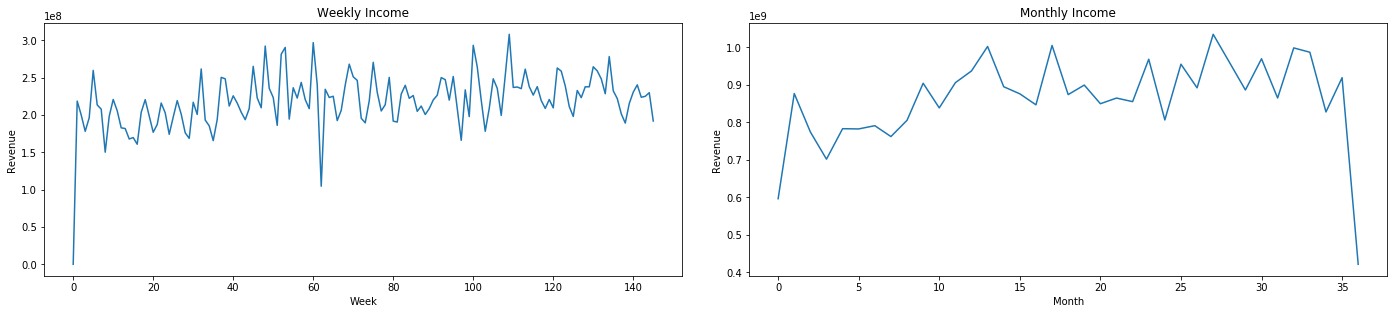

In [205]:
df['revenue']=df['checkout_price']*df['num_orders']
df['month']=list(map(int,df['week']/4))
month=[]
month_order=[]
for i in range(df['month'].max()+1):
    month.append(i)
    month_order.append(0)
for i in range(len(df['month'])):
    month_order[df.loc[i,'month']]=month_order[df.loc[i,'month']]+df.loc[i,'revenue']
week=[] 
week_order=[]
for i in range(df['week'].max()+1):
    week.append(i)
    week_order.append(0)
for i in range(len(df['week'])):
    week_order[df.loc[i,'week']]=week_order[df.loc[i,'week']]+df.loc[i,'revenue']
fig, axes= plt.subplots(nrows=1, ncols=2,figsize=(20,5))
axes[0].plot(week,week_order)
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Weekly Income')
axes[1].plot(month,month_order)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Monthly Income')
plt.tight_layout(pad=3.0)
plt.show()